Dados de exemplo:
   Investimento     Risco  Retorno Esperado  Indicador Crise  Valor Ativos  \
0      3.745401  1.851329          2.617057                0    286.519549   
1      9.507143  5.419009          2.469788                0    802.640312   
2      7.319939  8.729458          9.062546                0    997.237900   
3      5.986585  7.322249          2.495462                5     30.026005   
4      1.560186  8.065611          2.719497                0    897.365866   

   Sucesso  
0        1  
1        1  
2        1  
3        0  
4        1  

=== Decision Tree ===
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



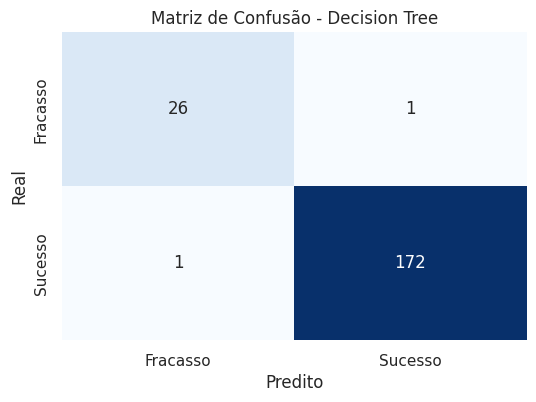


=== Random Forest ===
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



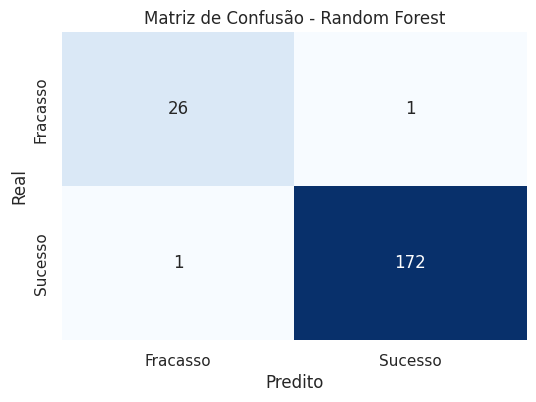


=== Gradient Boosting ===
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200



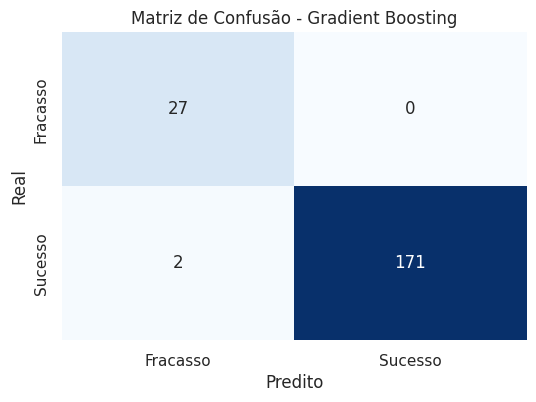


Melhores parâmetros encontrados (Random Forest):
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

Relatório de Classificação (Modelo Otimizado):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



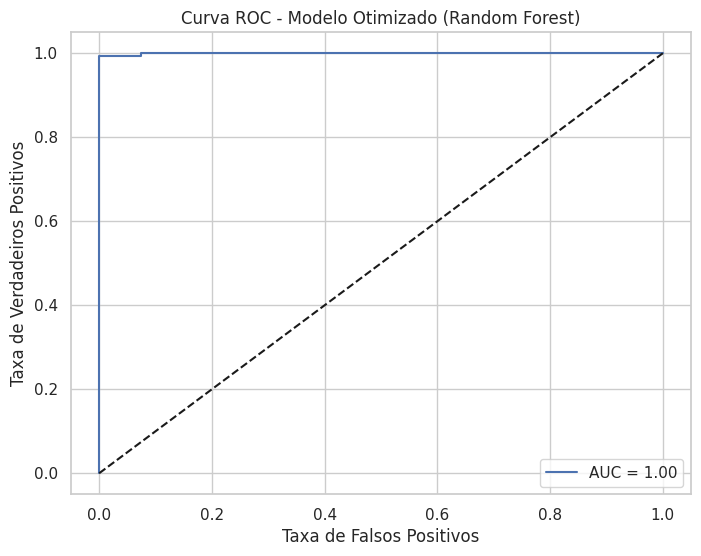

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


sns.set(style="whitegrid")

np.random.seed(42)
n_samples = 1000

X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 10
X3 = np.random.rand(n_samples) * 10
X4 = np.random.randint(0, 2, n_samples) * 5
X5 = np.random.rand(n_samples) * 1000


y = (0.25 * X1 + 0.4 * X2 + 0.15 * X3 + 0.1 * X4 + 0.1 * X5 + np.random.randn(n_samples) * 3 > 15).astype(int)


data = pd.DataFrame({
    'Investimento': X1,
    'Risco': X2,
    'Retorno Esperado': X3,
    'Indicador Crise': X4,
    'Valor Ativos': X5,
    'Sucesso': y
})

print("Dados de exemplo:")
print(data.head())


X = data.drop('Sucesso', axis=1)
y = data['Sucesso']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {model_name} ===")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))


    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fracasso', 'Sucesso'], yticklabels=['Fracasso', 'Sucesso'])
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados (Random Forest):")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print("\nRelatório de Classificação (Modelo Otimizado):")
print(classification_report(y_test, y_pred_optimized))

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelo Otimizado (Random Forest)')
plt.legend(loc='lower right')
plt.show()
